# Imports

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import time
import glob
from sklearn.preprocessing import OneHotEncoder

%matplotlib inline
plt.style.use('dark_background')

In [3]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",200)

In [4]:
os.getcwd()

'/Users/nicoroble/adtech-compe-2018-e/ml/notebook'

In [6]:
file_path = glob.glob("../../data/*")
csv_path = glob.glob("../../data/*.csv")

In [7]:
file_path

['../../data/banner_size_master.csv',
 '../../data/demogra.csv',
 '../../data/train.csv',
 '../../data/banner_position_master.csv',
 '../../data/device_type_master.csv']

In [8]:
csv_path

['../../data/banner_size_master.csv',
 '../../data/demogra.csv',
 '../../data/train.csv',
 '../../data/banner_position_master.csv',
 '../../data/device_type_master.csv']

# read data 

In [46]:
banner_size_master = pd.read_csv(csv_path[0])
demogra = pd.read_csv(csv_path[1])
df_train = pd.read_csv(csv_path[2])
banner_position_master = pd.read_csv(csv_path[3])
device_type_master = pd.read_csv(csv_path[4])

In [11]:
banner_size_master

,id,bannerSize
0,1,320×50
1,2,320×100
2,3,300×250
3,4,320×480


In [12]:
demogra.head()

,deviceId,age,gender,hasChild,income,isMarried
0,cc6f3c56-f35f-4de5-b6a0-6cf8f5fd44c2,36.0,female,yes,458.0,yes
1,57525600-3f29-4ff9-b236-ea32fc43d78c,52.0,female,no,678.0,no
2,18221f19-865b-4923-a5a9-ea13239d3aad,40.0,female,no,NaN,NaN
3,68a69f8a-a3d6-467a-832a-04f626737a81,42.0,UNKNOWN,NaN,536.0,yes
4,8b0cde1a-b024-43cf-a218-40b7abab7bde,38.0,female,NaN,NaN,NaN


In [13]:
df_train.head()

,deviceId,bannerPosition,bannerSize,deviceType,floorPrice,id,mediaId,osType,timestamp,advId,isClick
0,cc6f3c56-f35f-4de5-b6a0-6cf8f5fd44c2,6,4,1,19392.00,8abefa99-20b6-45ea-8e5b-c74081fb1fb1,608,iOS,1535203765,11,0
1,57525600-3f29-4ff9-b236-ea32fc43d78c,5,1,1,6758.20,f1e449fd-16c7-48a0-87ce-ce7f6cb1bf58,176,iOS,1535135105,6,1
2,18221f19-865b-4923-a5a9-ea13239d3aad,5,1,1,8816.15,cbe73705-bb9d-453c-b191-e1e243347beb,281,iOS,1534845969,1,0
3,68a69f8a-a3d6-467a-832a-04f626737a81,5,3,1,9572.60,e770ef71-54a3-40be-8361-65a6128dac0e,22,ANDROID,1534931092,2,1
4,8b0cde1a-b024-43cf-a218-40b7abab7bde,1,1,1,9793.30,923f1982-947c-4e81-9d43-b31d20c4579f,869,iOS,1535129929,15,0


In [14]:
banner_position_master

,id,bannerPosition
0,1,Above the Fold
1,2,Below the Fold
2,3,Header
3,4,Footer
4,5,Sidebar
5,6,Full Screen


In [15]:
device_type_master

,id,deviceType
0,1,Mobile
1,2,PC
2,3,Tablet


# check dtypes etc. 

In [17]:
print("------- demogra --------")
print("")  
print("data type:\n",demogra.dtypes)
print("")
print("number of null:\n",demogra.isnull().sum())
print("")
print("data length:\n",len(demogra))
print("")
print("u_unique:\n",demogra.nunique())

------- demogra --------

data type:
 deviceId      object
age          float64
gender        object
hasChild      object
income       float64
isMarried     object
dtype: object

number of null:
 deviceId          0
age           59935
gender            0
hasChild     225409
income       174807
isMarried    124871
dtype: int64

data length:
 500000

u_unique:
 deviceId     500000
age              65
gender            3
hasChild          2
income          419
isMarried         2
dtype: int64


In [18]:
print("------- df_train --------")
print("")  
print("data type:\n",df_train.dtypes)
print("")
print("number of null:\n",df_train.isnull().sum())
print("")
print("data length:\n",len(df_train))
print("")
print("u_unique:\n",df_train.nunique())

------- df_train --------

data type:
 deviceId           object
bannerPosition      int64
bannerSize          int64
deviceType          int64
floorPrice        float64
id                 object
mediaId             int64
osType             object
timestamp           int64
advId               int64
isClick             int64
dtype: object

number of null:
 deviceId          0
bannerPosition    0
bannerSize        0
deviceType        0
floorPrice        0
id                0
mediaId           0
osType            0
timestamp         0
advId             0
isClick           0
dtype: int64

data length:
 10000000

u_unique:
 deviceId            500000
bannerPosition           6
bannerSize               4
deviceType               1
floorPrice          386585
id                10000000
mediaId               1000
osType                   2
timestamp           604800
advId                   20
isClick                  2
dtype: int64


In [19]:
# 基本統計量
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
bannerPosition,10000000.0,3.880406e+00,1.656776,1.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00
bannerSize,10000000.0,2.249909e+00,1.219575,1.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00
deviceType,10000000.0,1.000000e+00,0.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
floorPrice,10000000.0,8.980794e+03,2901.756569,0.000000e+00,7.253950e+03,8.156400e+03,9.525550e+03,3.304275e+04
mediaId,10000000.0,4.994179e+02,288.674275,0.000000e+00,2.490000e+02,4.990000e+02,7.490000e+02,9.990000e+02
timestamp,10000000.0,1.535080e+09,174568.228693,1.534777e+09,1.534928e+09,1.535080e+09,1.535231e+09,1.535382e+09
advId,10000000.0,1.050292e+01,5.765755,1.000000e+00,6.000000e+00,1.100000e+01,1.600000e+01,2.000000e+01
isClick,10000000.0,2.453404e-01,0.430289,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


In [20]:
# 基本統計量
demogra.describe().T

,count,mean,std,min,25%,50%,75%,max
age,440065.0,45.500342,9.995720,15.0,39.0,46.0,52.0,79.0
income,325193.0,537.125630,93.662296,39.0,465.0,537.0,644.0,704.0


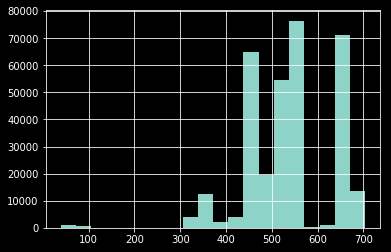

In [23]:
plt.style.use('dark_background')
demogra["income"].hist(bins=20)

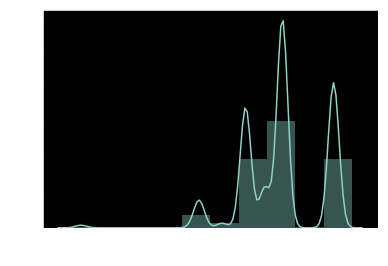

In [29]:
sns.distplot(demogra['income'].dropna(), kde=True, bins=10)

In [23]:
print(demogra[demogra['age'].isnull()])

                                    deviceId  age   gender hasChild  income  \
8       ce3ceeec-6aa5-4785-9013-88e5ced6df1c  NaN     male       no     NaN   
12      b95cbd52-a9c6-489e-a7e6-102212058bb6  NaN   female      NaN   467.0   
35      95f3f1c5-3f36-4cfb-91db-fa0e8e88efe3  NaN     male      NaN   537.0   
38      83d5d019-f845-4990-98f7-fb68fedc7bfa  NaN   female      yes   469.0   
71      89eefd2e-5daf-48bc-8712-fd99cb0b0c2f  NaN   female       no   338.0   
101     0f66429f-dfaa-48ef-bb98-9b738f9f9946  NaN   female      yes   650.0   
105     c587c2a3-8846-42a4-ab7a-5b9c208b5388  NaN   female       no     NaN   
115     9f5ff9a5-fa16-455d-a6d6-d7174f0f57e4  NaN  UNKNOWN       no     NaN   
119     085207e7-1796-46f5-bfb8-9bb69178c80a  NaN   female       no   537.0   
124     e30abc79-cb50-42e1-9e38-ca44a2b6188e  NaN   female      yes     NaN   
125     da9d8299-137d-4948-b09b-b6157c687cdf  NaN  UNKNOWN      NaN   666.0   
138     b20c90c6-9b0b-4847-b471-6bd649a19659  NaN   

# target 

(array([7546596.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0., 2453404.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

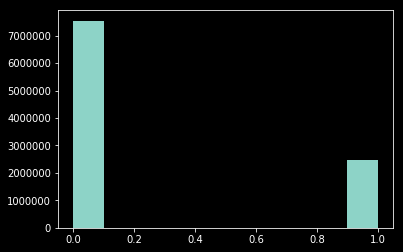

In [15]:
plt.hist(df_train["isClick"])

# preprocess 

## df_train

・ToDo:

①"bannerPosition"を広告が目立つ順にone-hot-encoding。

②"deviceType"をone-hot-encoding。

③"mediaId"を（少ないカテゴリをothersにまとめて）one-hot-encodingやcount-encodingなどに変換。

④"osType"をone-hot-encoding。

⑤"timestamp"を時間帯で区分して（午前・午後・深夜等）one-hot-encoding?

⑥"advId"をone-hot-encoding。

## demogra

・ToDo:

①"age"を平均値補完。

②"gender"をone-hot-encoding。

③"hasChild"をone-hot-encoding。

④"income"を平均値補完。

⑤"isMarried"をone-hot-encoding。

In [47]:
demogra.head()

,deviceId,age,gender,hasChild,income,isMarried
0,cc6f3c56-f35f-4de5-b6a0-6cf8f5fd44c2,36.0,female,yes,458.0,yes
1,57525600-3f29-4ff9-b236-ea32fc43d78c,52.0,female,no,678.0,no
2,18221f19-865b-4923-a5a9-ea13239d3aad,40.0,female,no,NaN,NaN
3,68a69f8a-a3d6-467a-832a-04f626737a81,42.0,UNKNOWN,NaN,536.0,yes
4,8b0cde1a-b024-43cf-a218-40b7abab7bde,38.0,female,NaN,NaN,NaN


In [48]:
gender_dummies = pd.get_dummies(demogra["gender"])

In [49]:
gender_dummies.drop(['UNKNOWN'], axis=1, inplace=True)

In [50]:
gender_dummies.head()

,female,male
0,1,0
1,1,0
2,1,0
3,0,0
4,1,0


In [51]:
demogra.drop(['gender'], axis=1, inplace=True)

In [61]:
demogra = demogra.join(gender_dummies)

In [62]:
demogra.head()

,deviceId,age,hasChild,income,isMarried,female,male
0,cc6f3c56-f35f-4de5-b6a0-6cf8f5fd44c2,36.0,yes,458.0,yes,1,0
1,57525600-3f29-4ff9-b236-ea32fc43d78c,52.0,no,678.0,no,1,0
2,18221f19-865b-4923-a5a9-ea13239d3aad,40.0,no,NaN,NaN,1,0
3,68a69f8a-a3d6-467a-832a-04f626737a81,42.0,NaN,536.0,yes,0,0
4,8b0cde1a-b024-43cf-a218-40b7abab7bde,38.0,NaN,NaN,NaN,1,0


In [66]:
demogra['isMarried'] = demogra['isMarried'].fillna('UKNOWN')

In [67]:
is_married_dummies = pd.get_dummies(demogra['isMarried'])

In [74]:
is_married_dummies.drop(['UKNOWN'], axis=1, inplace=True)

In [76]:
is_married_dummies.head()

,no,yes
0,0,1
1,1,0
2,0,0
3,0,1
4,0,0


In [78]:
is_married_dummies.columns = ['not_married', 'married']

In [79]:
is_married_dummies.head()

,not_married,married
0,0,1
1,1,0
2,0,0
3,0,1
4,0,0


In [81]:
demogra.drop(['isMarried'], axis=1, inplace=True)

In [83]:
demogra = demogra.join(is_married_dummies)

In [84]:
demogra.head()

,deviceId,age,hasChild,income,female,male,not_married,married
0,cc6f3c56-f35f-4de5-b6a0-6cf8f5fd44c2,36.0,yes,458.0,1,0,0,1
1,57525600-3f29-4ff9-b236-ea32fc43d78c,52.0,no,678.0,1,0,1,0
2,18221f19-865b-4923-a5a9-ea13239d3aad,40.0,no,NaN,1,0,0,0
3,68a69f8a-a3d6-467a-832a-04f626737a81,42.0,NaN,536.0,0,0,0,1
4,8b0cde1a-b024-43cf-a218-40b7abab7bde,38.0,NaN,NaN,1,0,0,0


In [87]:
demogra['hasChild'].fillna('NAN', inplace=True)

In [88]:
has_child_dummies = pd.get_dummies(demogra['hasChild'])

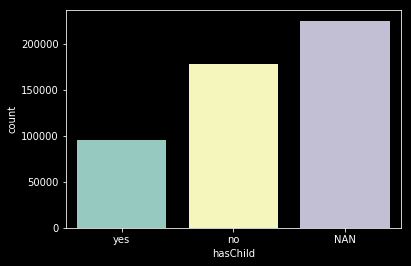

In [90]:
sns.countplot(demogra['hasChild'])

In [89]:
has_child_dummies.head()

,NAN,no,yes
0,0,0,1
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0


In [92]:
has_child_dummies.drop(['NAN'], axis=1, inplace=True)

In [93]:
has_child_dummies.head()

,no,yes
0,0,1
1,1,0
2,1,0
3,0,0
4,0,0


In [95]:
demogra.drop(['hasChild'], axis=1, inplace=True)

In [96]:
demogra = demogra.join(has_child_dummies)

In [99]:
demogra['income'].fillna(demogra['income'].mean(), inplace=True)

In [100]:
demogra['age'].fillna(demogra['age'].mean(), inplace=True)

In [102]:
demogra.describe()

,age,income,female,male,not_married,married,no,yes
count,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000
mean,45.500342,537.125630,0.523286,0.347296,0.278604,0.471654,0.357506,0.191676
std,9.377507,75.535335,0.499458,0.476111,0.448313,0.499196,0.479266,0.393620
min,15.000000,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,526.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45.500342,537.125630,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,545.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,79.000000,704.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [104]:
demogra.to_csv("../../data/demogra_cleaned.csv")

## merge

・ToDo:

①前処理後のdf_trainとdemograをdeviceIdをキーにしてmerge。

②標準化する。